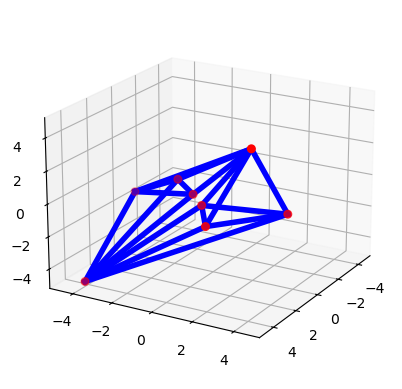

In [1]:
# Define the vertices
vertices = [
    vector([40/10, 41/10, 50/10]),  # p1
    vector([41/10, 2, 0]),            # p2
    vector([11/10, 300/70, 0]),    # p3
    vector([2, 10/17, 0]),   # p4
    vector([41/10, -41/10, -50/10]),             # p5
    vector([-3/2, -5, -2]),    # p3
    vector([-1/3, -2, 0]),   # p4
    vector([1, -3/7, 0])   # p6
]



edges = [(0, 1), (0, 2), (0, 3), (0, 5), (0, 6), (0, 7),
         (4, 1), (4, 2), (4, 3), (4, 5), (4, 6), (4, 7),
         (1, 2), (2, 3), (3, 1), (5, 6), (6, 7), (7, 5)]


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_graph(vertices, edges):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    x = [v[0] for v in vertices]
    y = [v[1] for v in vertices]
    z = [v[2] for v in vertices]

    # Plot vertices
    ax.scatter(x, y, z, color='red', s=30)  # s is the size of points

    # Plot edges
    for edge in edges:
        ax.plot([vertices[edge[0]][0], vertices[edge[1]][0]],
                [vertices[edge[0]][1], vertices[edge[1]][1]],
                [vertices[edge[0]][2], vertices[edge[1]][2]], color='blue', linewidth=4)

    # Set axes limits
    ax.set_xlim([-5, 5])
    ax.set_ylim([-5, 5])
    ax.set_zlim([-5, 5])

    # Set fixed viewpoint
    ax.view_init(elev=20, azim=30)  # Change angles as needed

    return plt

plt = plot_graph(vertices, edges)









In [2]:
R=Matrix(QQ, 18, 24)
# Define the vertices
vertices = [
    vector([40/10, 41/10, 50/10]),  # p1
    vector([41/10, 2, 0]),            # p2
    vector([11/10, 300/70, 0]),    # p3
    vector([2, 10/17, 0]),   # p4
    vector([41/10, -41/10, -50/10]),             # p5
    vector([-3/2, -5, -2]),    # p3
    vector([-1/3, -2, 0]),   # p4
    vector([1, -3/7, 0])   # p6
]




edges = [(0, 1), (0, 2), (0, 3), (0, 5), (0, 6), (0, 7),
         (4, 1), (4, 2), (4, 3), (4, 5), (4, 6), (4, 7),
         (1, 2), (2, 3), (3, 1), (5, 6), (6, 7), (7, 5)]



def buildMatrix(vertices, edges, R):
    for k, (i, j) in enumerate(edges):
        for dim in range(3):
            R[k, 3*i + dim] = vertices[j][dim] - vertices[i][dim]
            R[k, 3*j + dim] = -vertices[j][dim] + vertices[i][dim]
    cols_to_remove = [0, 1, 2, 4, 5, 8]
    # Remove these columns from the rigidity matrix
    R = R.delete_columns(cols_to_remove)   
    return R

R = buildMatrix(vertices, edges, R)
print(R.rank())

17


In [3]:
R=Matrix(QQ, 18, 24)
# Define the vertices
vertices = [
    vector([40/10, 41/10, 50/10]),  # p1
    vector([41/10, 2, 0]),            # p2
    vector([11/10, 300/70, 0]),    # p3
    vector([2, 10/17, 0]),   # p4
    vector([41/10, -41/10, -50/10]),             # p5
    vector([-3/2, -5, -2]),    # p3
    vector([-1/3, -2, 0]),   # p4
    vector([1, -3/7, 0])   # p6
]




edges = [(0, 1), (0, 2), (0, 3), (0, 5), (0, 6), (0, 7),
         (4, 1), (4, 2), (4, 3), (4, 5), (4, 6), (4, 7),
         (1, 2), (2, 3), (3, 1), (5, 6), (6, 7), (7, 5)]


# Function to compute the kernel
def get_kernel(vertices, edges, R):
    for k, (i, j) in enumerate(edges):
        for dim in range(3):
            R[k, 3*i + dim] = vertices[j][dim] - vertices[i][dim]
            R[k, 3*j + dim] = -vertices[j][dim] + vertices[i][dim]
    cols_to_remove = [0, 1, 2, 4, 5, 8]
    # Remove these columns from the rigidity matrix
    R = R.delete_columns(cols_to_remove) 
    kernel = R.right_kernel().basis()[0]  # This will be in rational numbers
    return  0.02*kernel
kernel = get_kernel(vertices, edges, R)

# Function to increment vertices with the kernel
def increment(vertices, kernel_vector):
    # Create a long vector from vertices
    long_vector = [coord for vertex in vertices for coord in vertex]
    
    # Indices/columns to remove
    remove_indices = [0, 1, 2, 4, 5, 8]
    
    # Store the original values at the specified indices
    original_values = [long_vector[idx] for idx in remove_indices]
    
    # Remove entries at specified indices
    remaining_vector = [val for idx, val in enumerate(long_vector) if idx not in remove_indices]
    
    # Add the kernel vector to the remaining entries
    for i in range(len(kernel_vector)):
        if i < len(remaining_vector):
            remaining_vector[i] += kernel_vector[i]
    
    final_vector = [0] * 24  # Initialize a list of 18 zeros
    for idx, val in zip(remove_indices, original_values):
        final_vector[idx] = val  
    
    remaining_index = 0
    for i in range(24):
        if i not in remove_indices:
            final_vector[i] = remaining_vector[remaining_index]
            remaining_index += 1
    
    # Now put the final vectors back into vertices
    new_vertices = []
    index = 0
    for i in range(8):  
        new_vertex = vector([QQ(final_vector[index]), QQ(final_vector[index + 1]), QQ(final_vector[index + 2])])  # Ensure QQ type
        new_vertices.append(new_vertex)
        index += 3
    
    return new_vertices

# Increment the vertices
vertices = increment(vertices, kernel)
print(kernel)
print(vertices)


(0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.0200000000000000, -0.0331547619047619, 0.0273869047619048, 0.0119047619047619, -0.0260912698412698, 0.0215138888888889, 0.00255102040816327, -0.0181547619047619, 0.0149124149659864)
[(4, 41/10, 5), (41/10, 2, 0), (11/10, 30/7, 0), (2, 10/17, 0), (41/10, -41/10, -5), (-37/25, -84557/16800, -331399/168000), (-193011412601600/600479950316089, -20423/10080, 70032485558/3255222053051), (393/392, -2196371076522/4916593482421, 17537/1176000)]


In [4]:
kernel = get_kernel(vertices, edges, R)
vertices = increment(vertices, kernel)
print(kernel)
print(vertices)
def plot_graph(vertices, edges):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Extracting x, y, z coordinates from vertices
    x = [v[0] for v in vertices]
    y = [v[1] for v in vertices]
    z = [v[2] for v in vertices]

    # Plot vertices
    ax.scatter(x, y, z, color='red', s=30)  # s is the size of points

    # Plot edges
    for edge in edges:
        ax.plot([vertices[edge[0]][0], vertices[edge[1]][0]],
                [vertices[edge[0]][1], vertices[edge[1]][1]],
                [vertices[edge[0]][2], vertices[edge[1]][2]], color='blue', linewidth=4)

    # Set axes limits
    ax.set_xlim([-5, 5])
    ax.set_ylim([-5, 5])
    ax.set_zlim([-5, 5])

    # Set fixed viewpoint
    ax.view_init(elev=20, azim=30)  # Change angles as needed

    return plt


(0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.0200000000000000, -0.0324962325478795, 0.0268469106892612, 0.0119670070516424, -0.0255954915374982, 0.0211079731312649, 0.00268739170344303, -0.0178433606287838, 0.0146584296326372)
[(4, 41/10, 5), (41/10, 2, 0), (11/10, 30/7, 0), (2, 10/17, 0), (41/10, -41/10, -5), (-73/50, -139570807/27552393, -132653888/68175657), (-87417131/282481384, -492808369/240196690, 25129126/589583017), (81186861/80763787, -47193545/101585532, 21925162/741445241)]


In [5]:
def project_kernel(new_kernel, old_kernel):
    # Calculate the dot product of new_kernel and old_kernel
    dot_product = sum(nk * ok for nk, ok in zip(new_kernel, old_kernel))
    
    # Calculate the norm squared of old_kernel
    old_norm_squared = sum(ok * ok for ok in old_kernel)
    
    # Calculate the projection scalar and project the new_kernel onto old_kernel
    projection = [(dot_product / old_norm_squared) * ok for ok in old_kernel]
    
    return projection


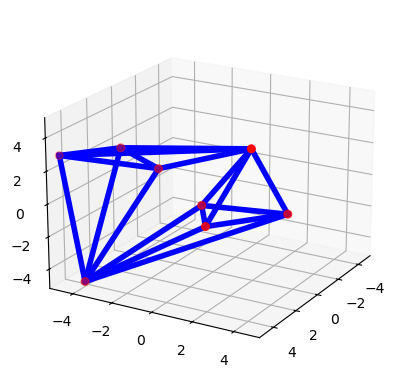

In [6]:
import time
from IPython.display import clear_output
import matplotlib.pyplot as plt

# Number of frames for the animation
num_frames = 150

# Get initial kernel
old_kernel = get_kernel(vertices, edges, R)

# Generate plots for each frame
for i in range(num_frames):
    # Clear the previous output
    clear_output(wait=True)

    # Create a plot for the current vertices and edges
    fig = plot_graph(vertices, edges)  # Create and return the plot

    # Show the plot
    plt.show()

    # Pause to display the frame
    time.sleep(float(0.035))  # Adjust the sleep duration for the desired delay

    # Calculate the new kernel
    new_kernel = get_kernel(vertices, edges, R)

    # Project the new kernel onto the old kernel
    projected_kernel = project_kernel(new_kernel, old_kernel)

    # Update vertices using the projected kernel
    vertices = increment(vertices, projected_kernel)

plt.ioff()
